In [2]:
import os
import math
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
%matplotlib inline 

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

# Data Exploration, Visualisation and Preprocessing

In [4]:
train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


None

In [6]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features.head(-10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False
8176,45,2013-04-26,50.64,3.615,1260.65,NaN,57.52,40.51,2476.18,193.589304,8.335,False
8177,45,2013-05-03,56.07,3.592,8345.40,6.00,92.96,3580.32,2242.24,NaN,NaN,False
8178,45,2013-05-10,58.86,3.583,4689.18,440.82,53.09,375.22,5738.20,NaN,NaN,False


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Observation:
1) Store: Store Number, unique identifier
2) Date: 2010 to 2013
3) Temperature: In Fahrenheit
4) Fuel Price: Price of Fuel on that day
5) MarkdownX: anonymized data related to promotional offers
6) CPI: Consumer Price Index
7) Unemployment: Rate of unemployment in the region
8) IsHoliday: If that particular day is holiday or normal working day

In [11]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [12]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [14]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Unique Store Types

In [16]:
display(stores['Type'].unique())

array(['A', 'B', 'C'], dtype=object)

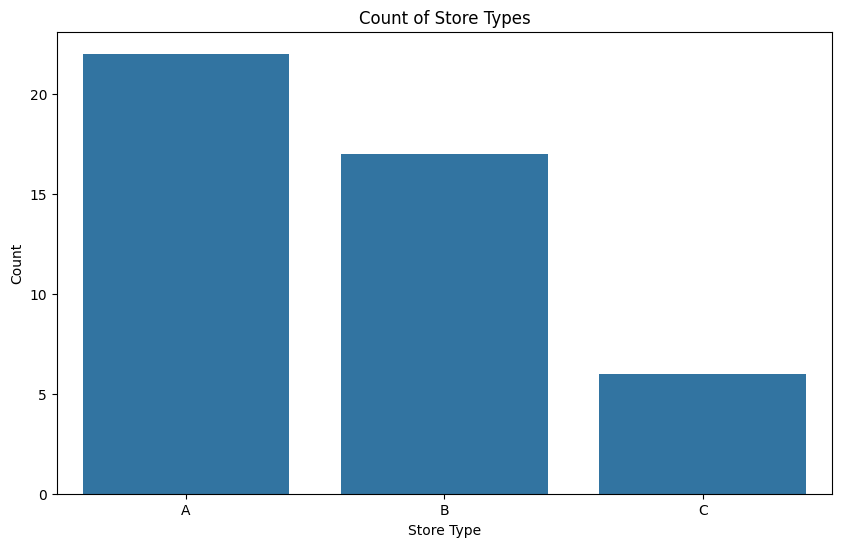

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=stores, x='Type')
plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

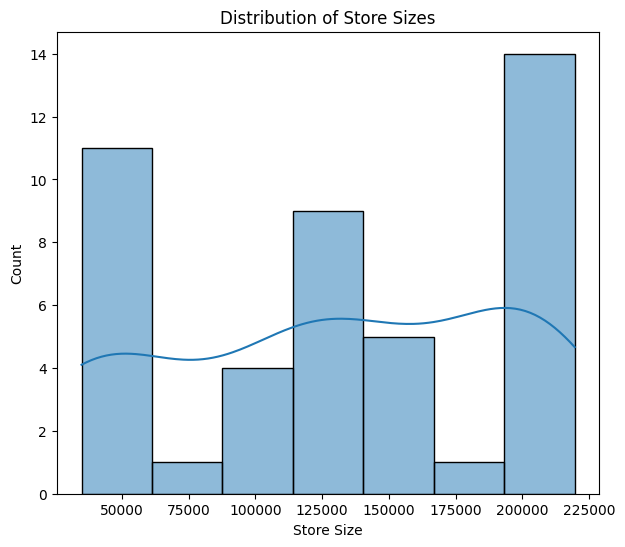

In [18]:
plt.figure(figsize=(7,6))
sns.histplot(data=stores, x='Size', kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.show()

Unique Departments


In [19]:
display(train['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

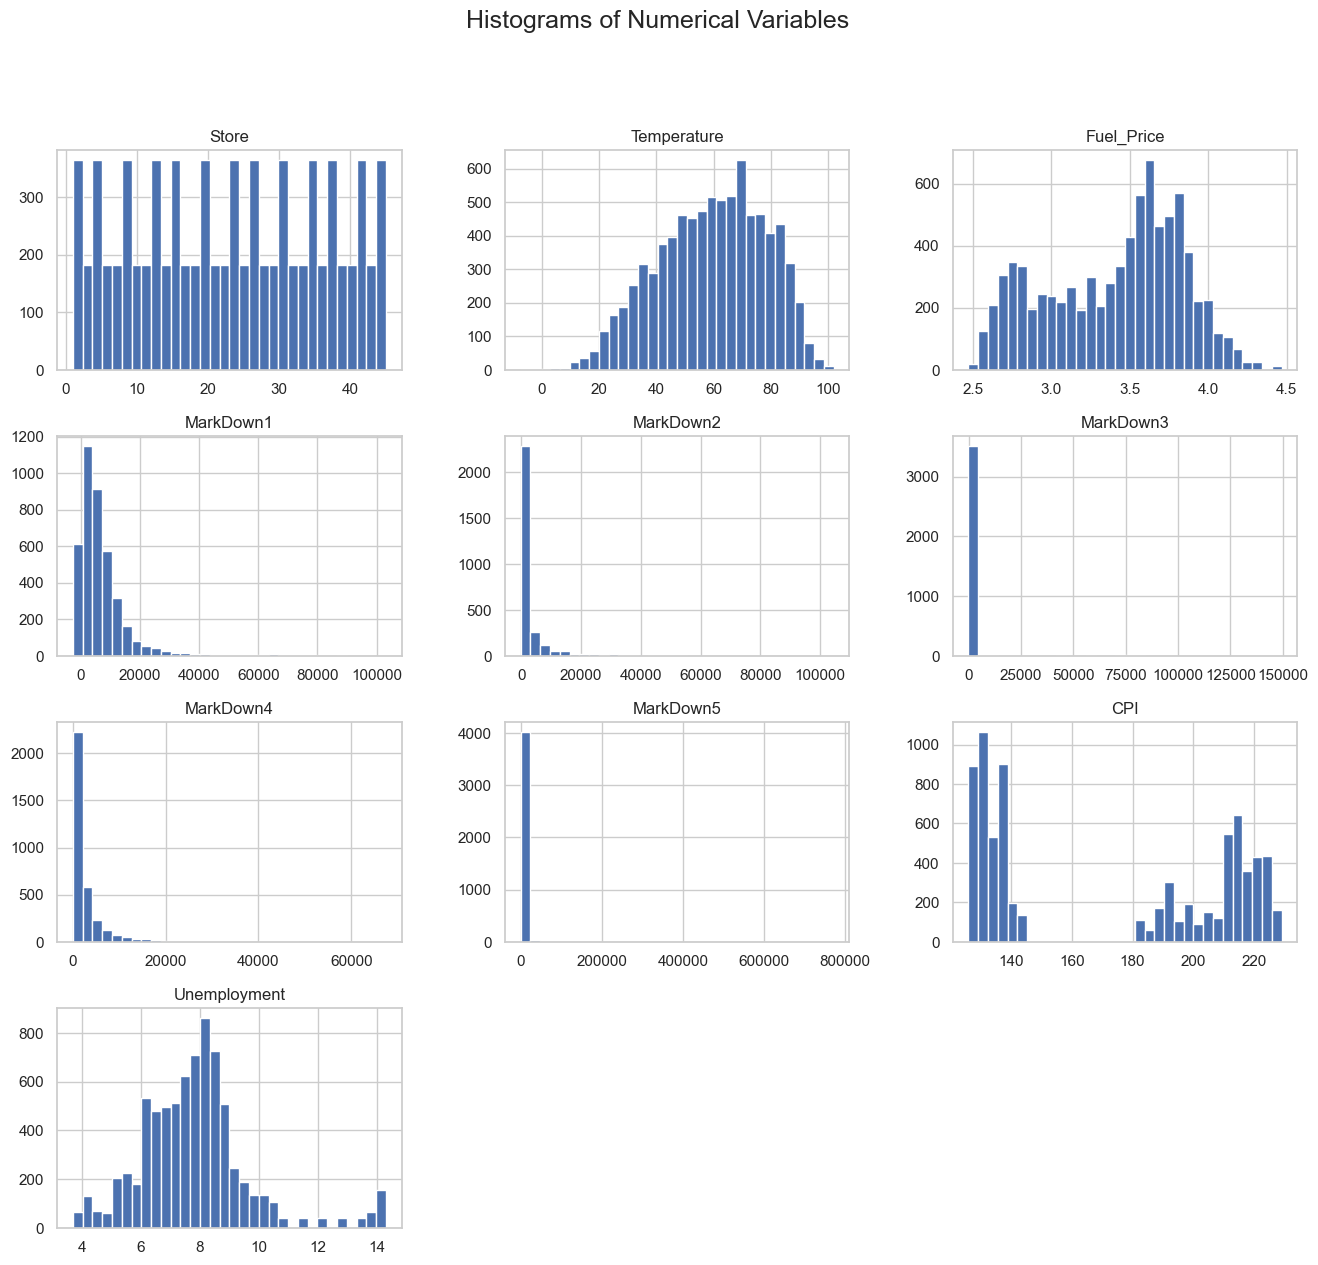

In [20]:
sns.set(style="whitegrid")

# Plot histograms for numerical variables
features.hist(bins=32, figsize=(16, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=18)
plt.show()

<Axes: >

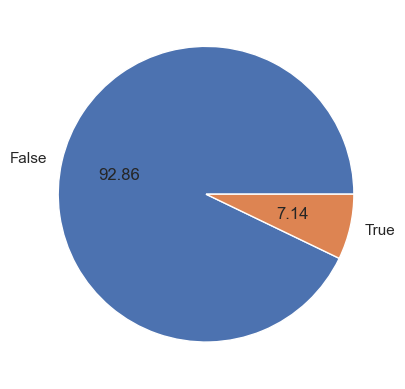

In [21]:
features.groupby('IsHoliday').size().plot(kind='pie', autopct='%.2f')

Weekly Sales vs Stores

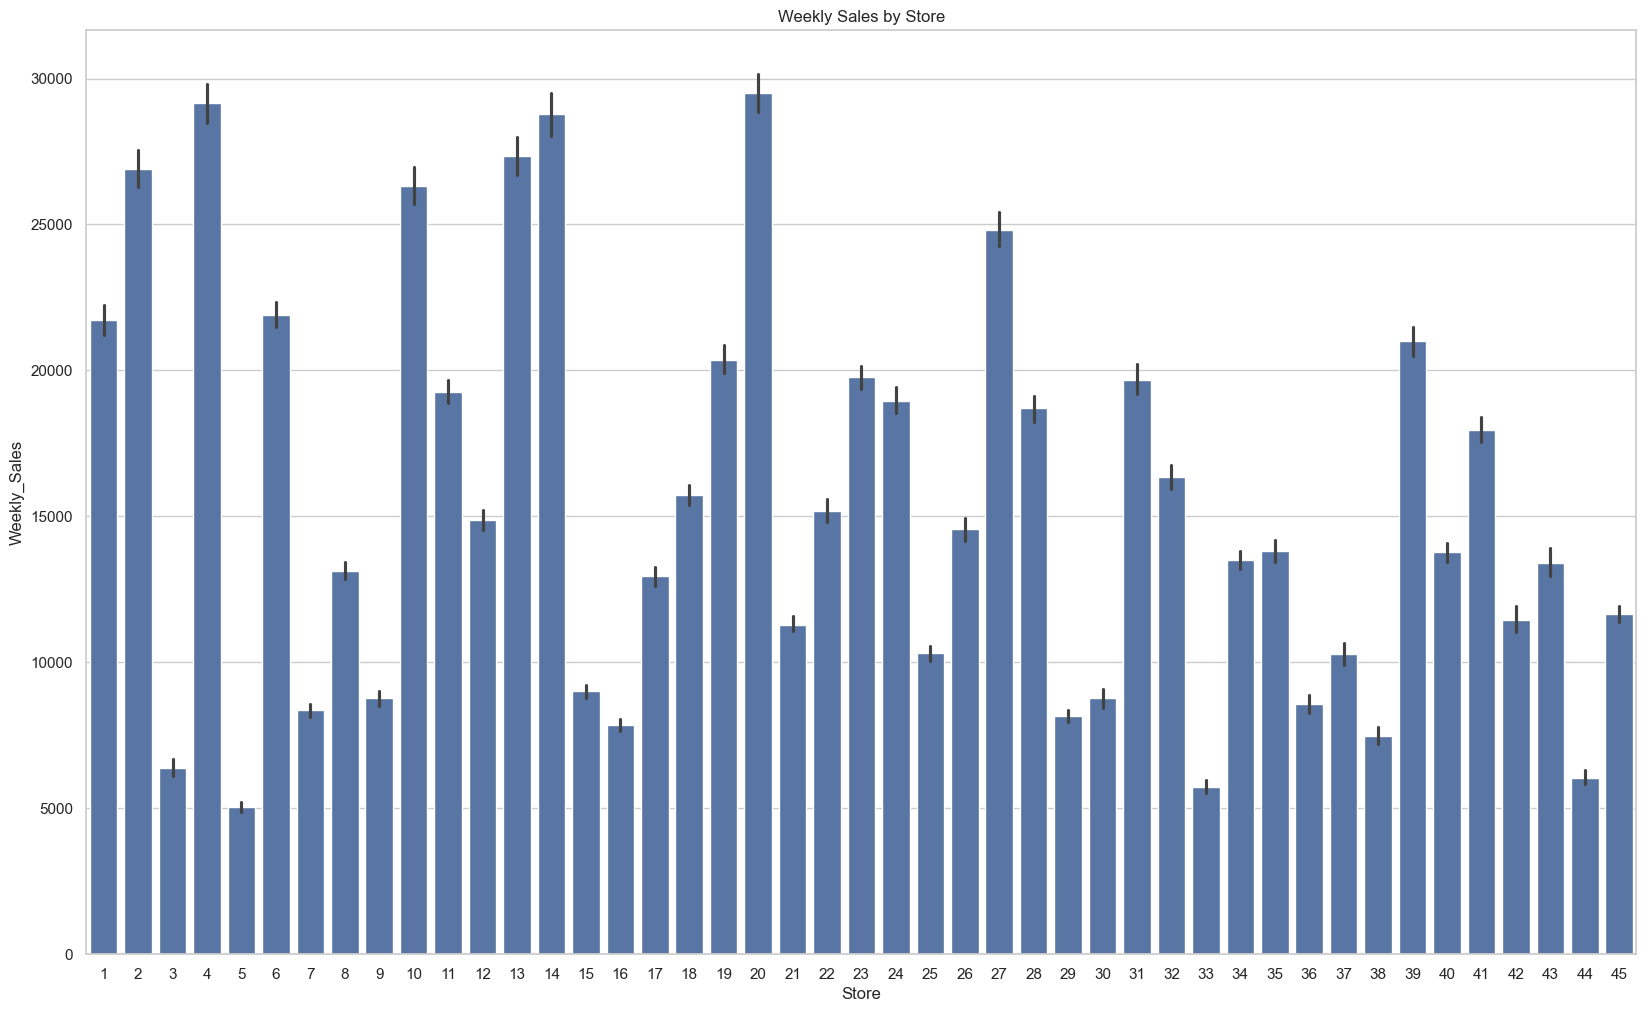

In [53]:
plt.figure(figsize=(20,12))
sns.barplot(data=train, x='Store', y= 'Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

# Observations:
1) Stores: 20, 4 and 14 have the highest sales.
2) Stores: 5, 3, and 33 have the lowest sales.

Weekly Sales vs Department


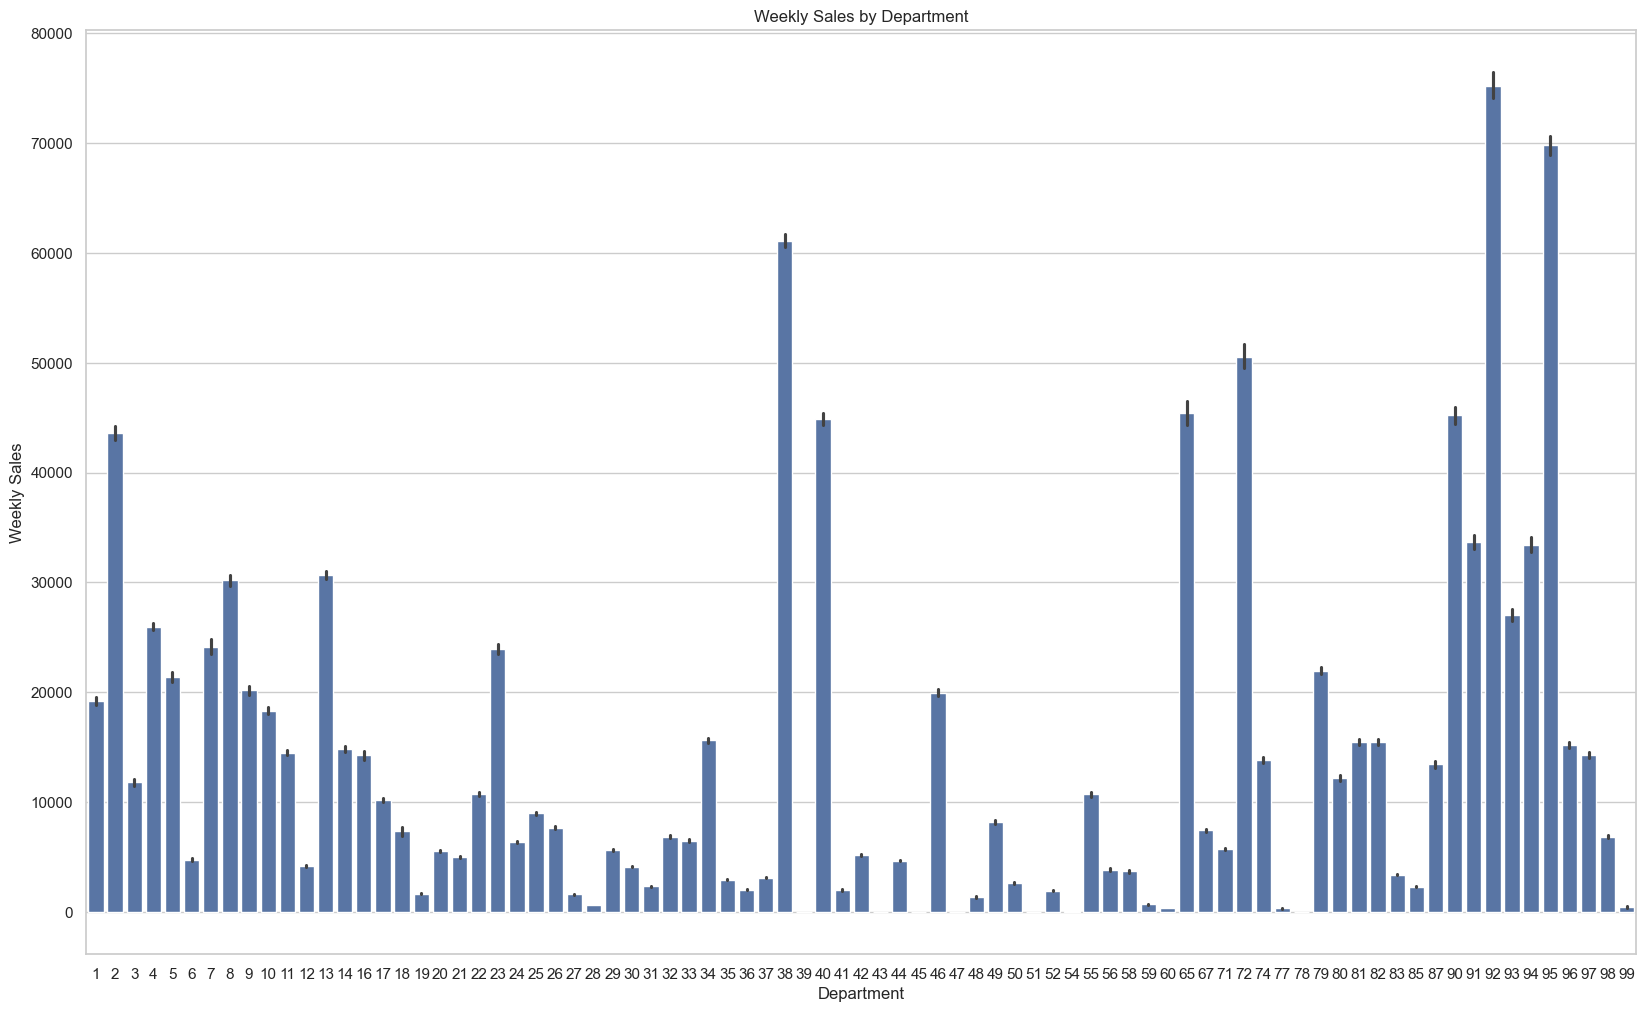

In [55]:
plt.figure(figsize=(20,12))
sns.barplot(data = train, x='Dept', y='Weekly_Sales')
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

Weekly Sales vs Date/Over Time

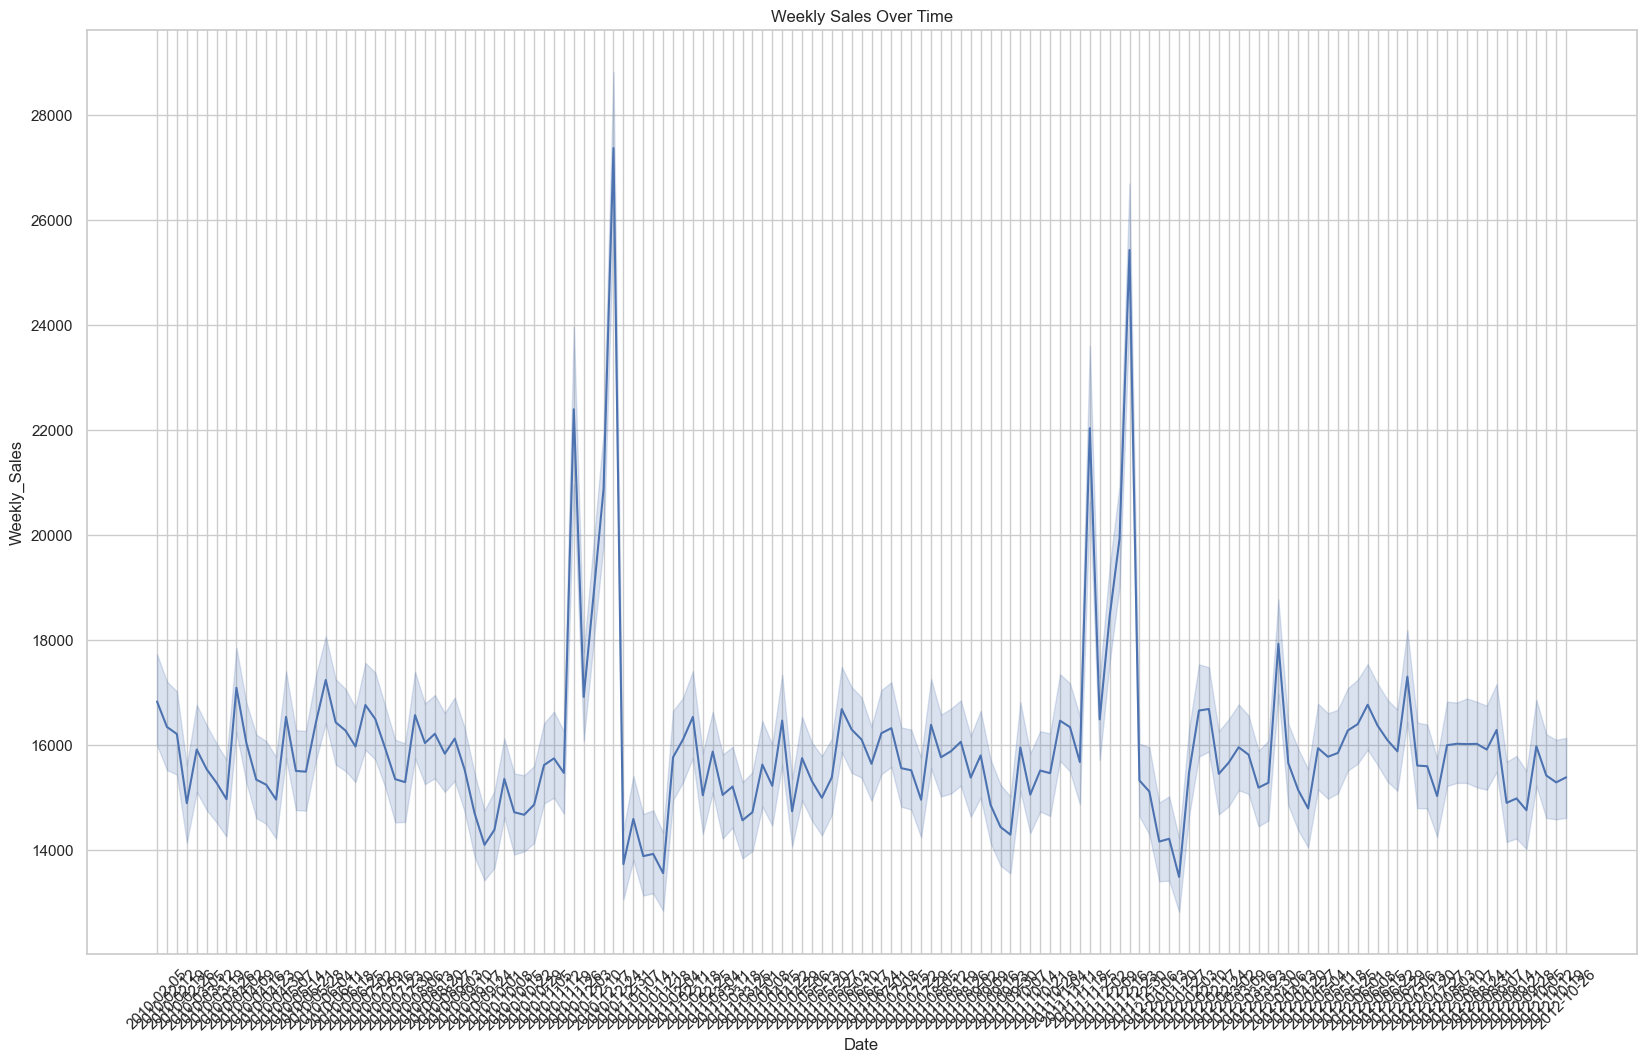

In [29]:
plt.figure(figsize=(20,12))
sns.lineplot(data = train, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering is needed for better understanding

Combining Store and Department Infos

In [30]:
train['Store_Dept'] = train['Store'].astype(str) + '_' + train['Dept'].astype(str)
test['Store_Dept'] = test['Store'].astype(str) + '_' + test['Dept'].astype(str)

Extract Month and Year from Date Column and encode categorical variables


In [41]:
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Year'] = pd.to_datetime(train['Date']).dt.year

test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Year'] = pd.to_datetime(test['Date']).dt.year

features['Month'] = pd.to_datetime(features['Date']).dt.month
features['Year'] = pd.to_datetime(features['Date']).dt.year

store_type_dummies = pd.get_dummies(stores['Type'], prefix = 'Store_Type', drop_first=True)
stores= pd.concat([stores, store_type_dummies], axis = 1)

Merge the additional features to datasets and Create features so we can capture the trend and seasonality in the data.

In [33]:
train = train.merge(stores, on='Store', how = 'left')
train = train.merge(features, on= ['Store', 'Date'], how='left')
test = test.merge(stores, on='Store',how = 'left')
test= test.merge(features,on =['Store','Date'], how ='left')

In [42]:
train['Weekly_Sales_cf1'] = train['Weekly_Sales'].shift(1)
train['Weekly_Sales_cf2'] = train['Weekly_Sales'].shift(2)

In [46]:
train['Rolling_Mean'] = train['Weekly_Sales'].rolling(window=2).mean()
train['Rolling_Std'] = train['Weekly_Sales'].rolling(window=2).std()

Create the seasonal features and convert 'Date' column to datetime format so we can sort it properly. 

In [47]:
train['Date'] = pd.to_datetime(train['Date'])
train['Month']  = train['Date'].dt.month
train['Quarter']  = train['Date'].dt.quarter
train['WeekOfYear']  = train['Date'].dt.isocalendar().week


In [48]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [49]:
train = train.sort_values('Date')
test = test.sort_values('Date')
features = features.sort_values('Date')

train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)
features.set_index('Date', inplace=True)

#Filling missing values
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
features.fillna(0, inplace=True)

#Reseting index
train.reset_index(inplace=True)
test.reset_index(inplace=True)
features.reset_index(inplace=True)

display(features.head())

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010
1,2010-02-05,31,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010
2,2010-02-05,21,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2,2010
3,2010-02-05,26,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False,2,2010
4,2010-02-05,41,30.27,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,7.541,False,2,2010


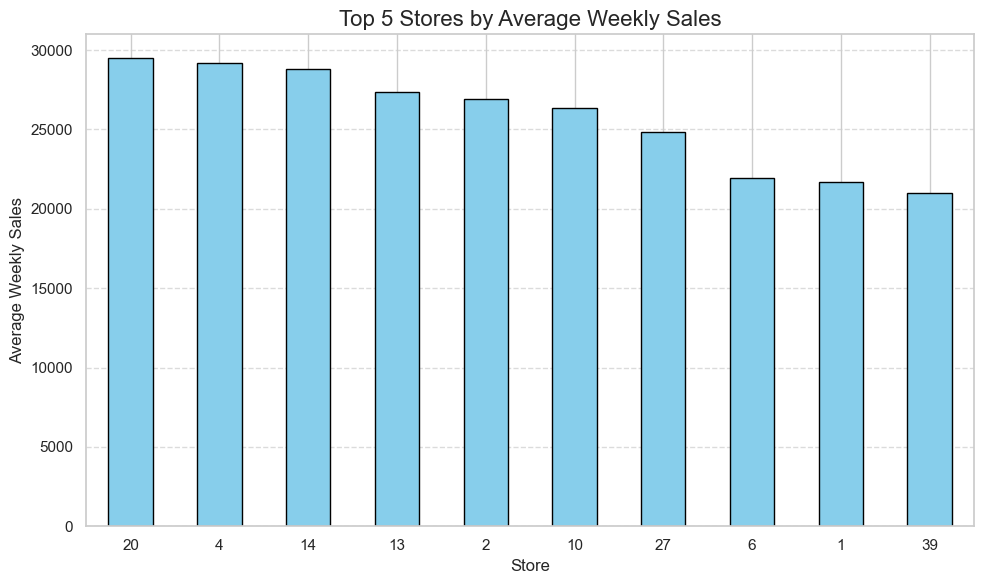

In [64]:
top_stores = train.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending = False)[:10]

#Plot
plt.figure(figsize=(10, 6))
top_stores.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Stores by Average Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

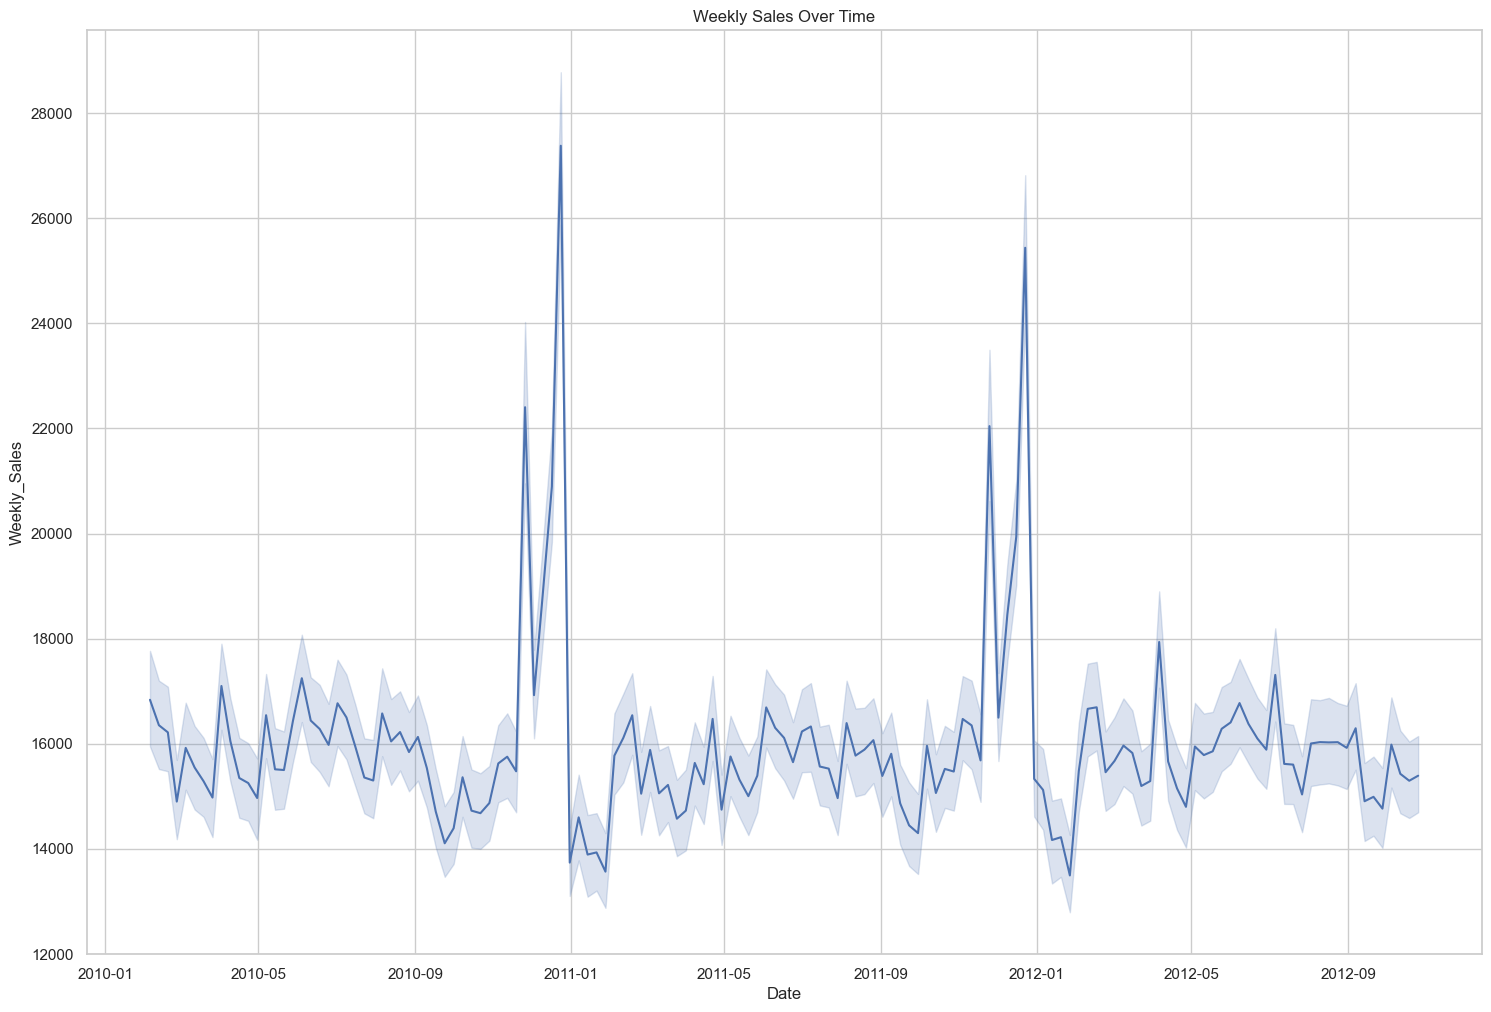

In [52]:
plt.figure(figsize=(18,12))
sns.lineplot(data = train, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=0)
plt.show()

# Observation: 
There's a spike in weekly sales during Nov-Dec every year i.e.: 2011-01 and 2012-01... which is the NEW YEAR's PERIOD. As per US Calendar, we can infer it's the time for Thanksgiving and Christmas as well.

Let's find more information related to Holiday Season, and try to explore more.

Average sales moves around 16000$ for the rest of the Months

C:\Users\Chirag\AppData\Local\Temp\ipykernel_13680\438500788.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = train,


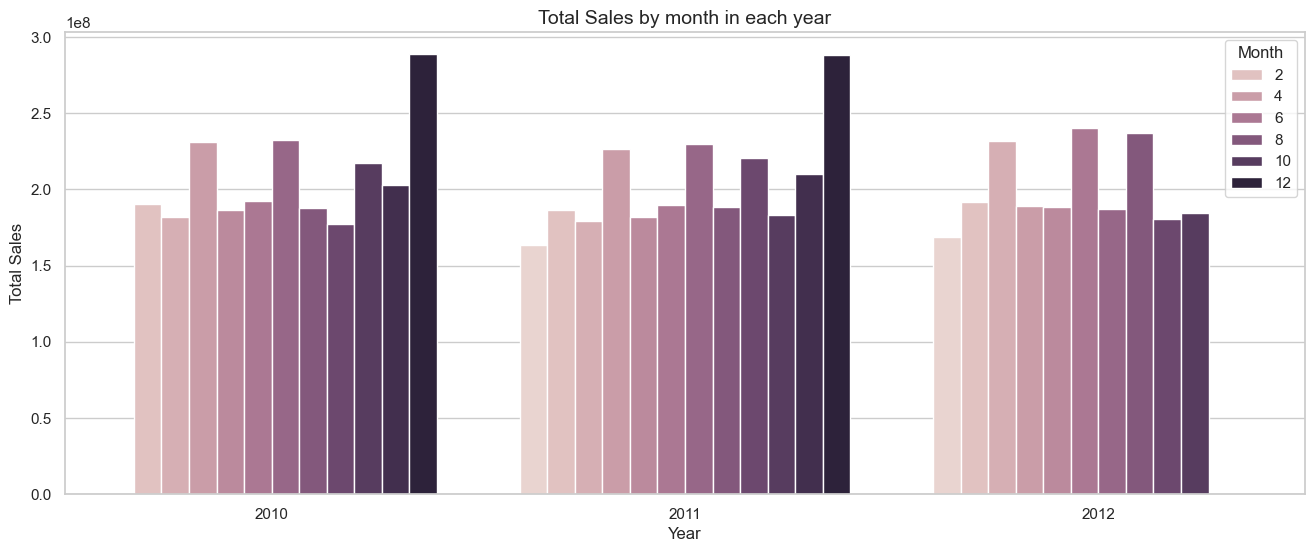

In [68]:
plt.figure(figsize = (16, 6))
sns.barplot(data = train,
           x = 'Year',
           y = 'Weekly_Sales',
           hue = 'Month',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by month in each year', size = 14)
plt.xlabel('Year', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()